# Window Size Selection
In this notebook, we test ClaSP ensembling strategies.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [2]:
methods = [
    ("Mean-ClaSP", "mean-clasp.csv"),
    ("Max-ClaSP", "max-clasp.csv"),
    ("FFT-ClaSP", "fft-clasp.csv"),
    ("ClaSP", "clasp.csv"),
]

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/window/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df.score
    
df_scores = df_scores.fillna(1)

In [3]:
df_scores

,name,Mean-ClaSP,Max-ClaSP,FFT-ClaSP,ClaSP
0,Cane,0.050749,0.001124,0.052060,0.001124
1,DutchFactory,0.004566,0.009017,0.020317,0.002055
2,EEGRat,0.017500,0.019000,0.007500,0.001500
3,EEGRat2,0.144500,0.136500,0.134000,0.091500
4,Fetal2013,0.002778,0.002778,0.003111,0.001889
5,GrandMalSeizures,0.211263,0.216960,0.216905,0.000922
6,GrandMalSeizures2,0.166491,0.127480,0.231669,0.000767
7,GreatBarbet1,0.001489,0.005319,0.005319,0.008936
8,GreatBarbet2,0.004043,0.006383,0.003830,0.008723
9,InsectEPG1,0.001471,0.001294,0.003176,0.001647


Let's calculate the mean/std error.

In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean(), 5)}")

Mean-ClaSP: mean_error=0.04361
Max-ClaSP: mean_error=0.07275
FFT-ClaSP: mean_error=0.06101
ClaSP: mean_error=0.01293


In [11]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std(), 5)}")

Mean-ClaSP: std_error=0.12559
Max-ClaSP: std_error=0.17427
FFT-ClaSP: std_error=0.10478
ClaSP: std_error=0.02465


Let's compute the wins per method.

In [5]:
ranks = df_scores.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [6]:
for name in df_scores.columns[1:]:
    print(f"{name}: wins={ranks[ranks[name] == 1].shape[0]}")

Mean-ClaSP: wins=24
Max-ClaSP: wins=11
FFT-ClaSP: wins=12
ClaSP: wins=60


Let's plot and output the ranks.

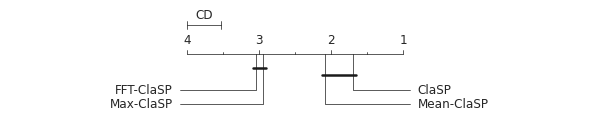

In [7]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=8, reverse=True, textspace=2.5)

In [8]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f" {name}: rank={np.round(rank, 5)}")

 Mean-ClaSP: rank=2.08163
 Max-ClaSP: rank=2.94898
 FFT-ClaSP: rank=3.04082
 ClaSP: rank=1.70408


Let's compute wins/losses against ClaSP.

In [9]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs Mean-ClaSP: (wins/losses/ties): 62/33/3
ClaSP vs Max-ClaSP: (wins/losses/ties): 71/18/9
ClaSP vs FFT-ClaSP: (wins/losses/ties): 78/18/2
